### Backend Preparation and Imports

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### A1.  Provide one question that is relevant to your chosen data set.

The question that I wish to answer is the following: Is there a significant difference in the average monthly charges between customers who churn and those who do not churn?

### A2.  Explain how stakeholders in the organization could benefit from an analysis of the data.

Stakeholders can benefit from answering this question in serveral ways. By understanding if there is a significant difference in the average monthly charges between churned and non-churned customers, the company can gain insights into the pricing dynamics/strategies and its impact on customer retention. This information can be used to optimize pricing strategies, tailor offerings, and potentially reduce customer churn rates.

### A3.  Identify all of the data in your data set that are relevant to answering your question in part A1.

To answer the above question in section A2, I will be using the following variables from the churn_clean.csv data set: Monthly Charge, Churn, Timely Response, and Tenure.

### B1. Using a T-Test to run an analysis of the Churn dataset.

In [2]:
df = pd.read_csv('churn_clean.csv')

To make some variables human readable, I will rename the "Item" variables.

In [3]:
df.rename(columns = {'Item1':'TimelyResponse',
                           'Item2':'TimelyFixes',
                           'Item3':'TimelyReplacements',
                           'Item4':'Reliability',
                           'Item5':'Options',
                           'Item6':'RespectfulResponses',
                           'Item7':'CourteousExchange',
                           'Item8':'ActiveListening'},
                inplace=True)

Now, in order to get a brief view of the dataframe, I will use the head() function. 

In [4]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,TimelyFixes,TimelyReplacements,Reliability,Options,RespectfulResponses,CourteousExchange,ActiveListening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


For this section, I am interested in are MonthlyCharge and Churn, I will extract these variables into a separate table in order to perform futher comparison and analysis.

In [5]:
comparison_df = df[["MonthlyCharge", "Churn"]].copy()
comparison_df.head()

,MonthlyCharge,Churn
0,172.455519,No
1,242.632554,Yes
2,159.947583,No
3,119.956840,No
4,149.948316,Yes


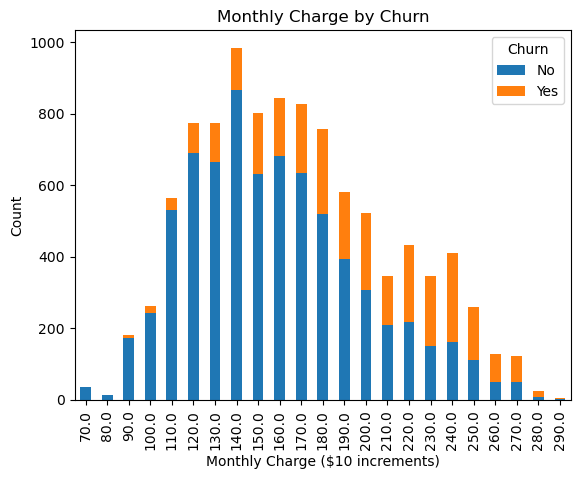

In [6]:
# Round MonthlyCharge to the nearest $10 increment for easier visualization
comparison_df['MonthlyCharge_Bucket'] = np.floor(comparison_df['MonthlyCharge'] / 10) * 10

# Create a pivot table with MonthlyCharge_Bucket and Churn
tbl = pd.pivot_table(comparison_df.groupby(['MonthlyCharge_Bucket', 'Churn']).size().reset_index(),
                     values=0,
                     index='MonthlyCharge_Bucket',
                     columns=['Churn'],
                     aggfunc=sum)

# Plot the stacked bar chart
tbl.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Monthly Charge ($10 increments)')
plt.ylabel('Count')
plt.title('Monthly Charge by Churn')

plt.show()

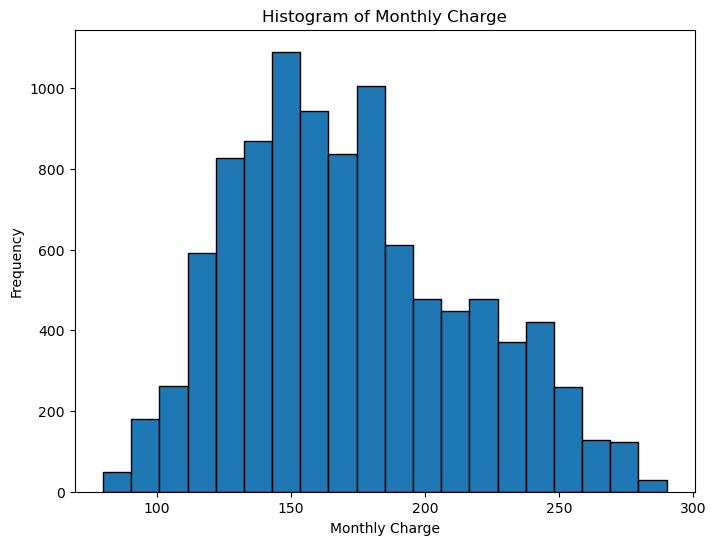

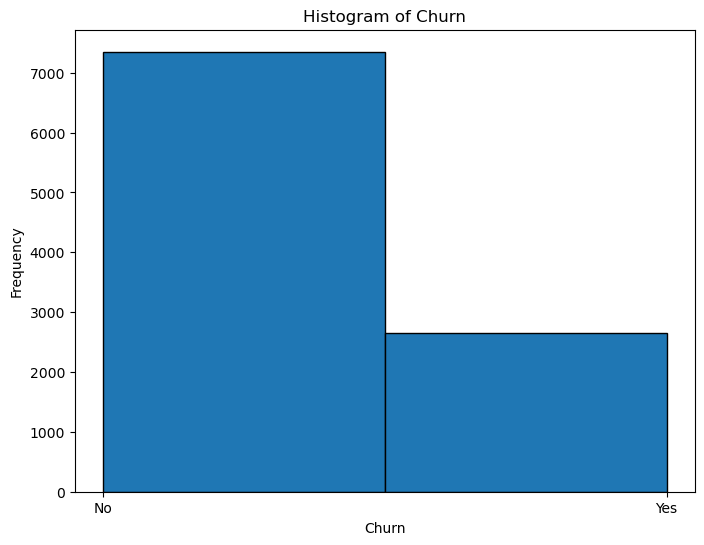

In [7]:
# Create a histogram for MonthlyCharge
plt.figure(figsize=(8, 6))
plt.hist(comparison_df['MonthlyCharge'], bins=20, edgecolor='black')
plt.xlabel('Monthly Charge')
plt.ylabel('Frequency')
plt.title('Histogram of Monthly Charge')
plt.show()

# Create a histogram for Churn
plt.figure(figsize=(8, 6))
plt.hist(comparison_df['Churn'], bins=2, edgecolor='black')
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.title('Histogram of Churn')
plt.show()

### B2.  Provide the output and the results of any calculations from the analysis you performed.

In [8]:
# Separate the MonthlyCharge values for churned and non-churned customers
monthly_charge_churned = comparison_df[comparison_df['Churn'] == 'Yes']['MonthlyCharge']
monthly_charge_non_churned = comparison_df[comparison_df['Churn'] == 'No']['MonthlyCharge']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(monthly_charge_churned, monthly_charge_non_churned)

# Print the results
print("T-Statistic: ", t_statistic)
print("P-Value: ", p_value)


T-Statistic:  40.18947672237426
P-Value:  0.0


### B3. Justify why you chose this analysis technique.


I chose to use the T Test to compare two separate groups of data, Monthly Charge and Churn, to see the relationship between the two. I used it to determine if there is a statistically significant difference present in the churn_clean dataset. Additionally, in my professional life, I utilize T Test regularly so I have some familiarity with the process, and as to why this test should be used and under what circumstances.

### C1.  Identify the distribution of two continuous variables and two categorical variables using univariate statistics from your cleaned and prepared data.

I will analyze the following variables below:

Continuous Variables:

    MonthlyCharge
    Tenure
    
Categorical Variables:

    Churn
    Timely Response

In [9]:
# Create the data frames that I will use for analysis

continuous_df = df[['MonthlyCharge', 'Tenure']].copy()
categorical_df = df[['Churn', 'TimelyResponse']].copy()


Summary Statistics for MonthlyCharge:
 count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

Summary Statistics for Tenure:
 count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64


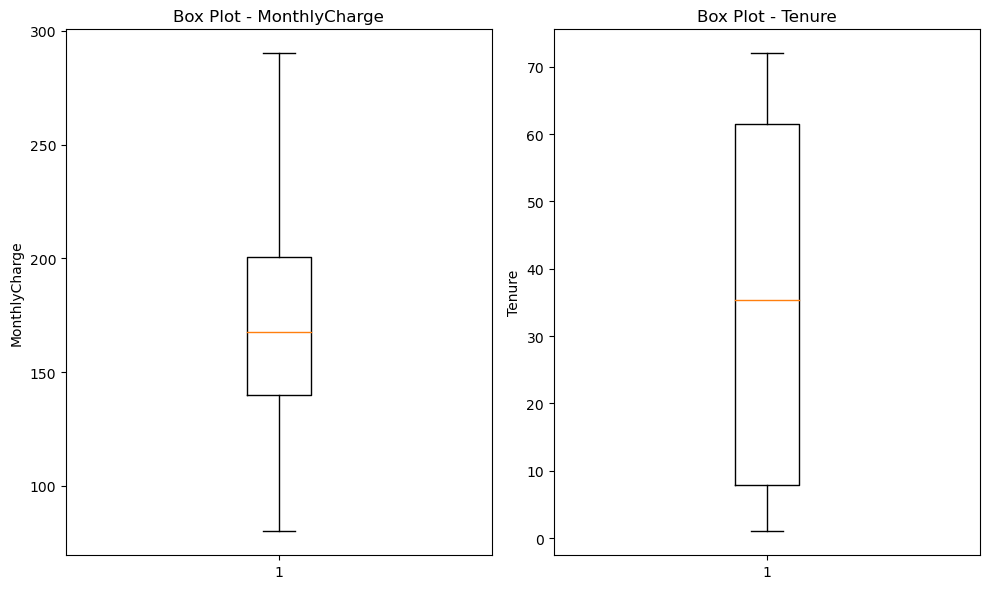

In [10]:
# Summary statistics for MonthlyCharge and Tenure
monthly_charge_stats = continuous_df['MonthlyCharge'].describe()
tenure_stats = continuous_df['Tenure'].describe()

# Box plot for MonthlyCharge and Tenure
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].boxplot(continuous_df['MonthlyCharge'])
axes[0].set_title('Box Plot - MonthlyCharge')
axes[0].set_ylabel('MonthlyCharge')
axes[1].boxplot(continuous_df['Tenure'])
axes[1].set_title('Box Plot - Tenure')
axes[1].set_ylabel('Tenure')

# Display the summary statistics
print("Summary Statistics for MonthlyCharge:\n", monthly_charge_stats)
print("\nSummary Statistics for Tenure:\n", tenure_stats)

# Show the box plots
plt.tight_layout()
plt.show()

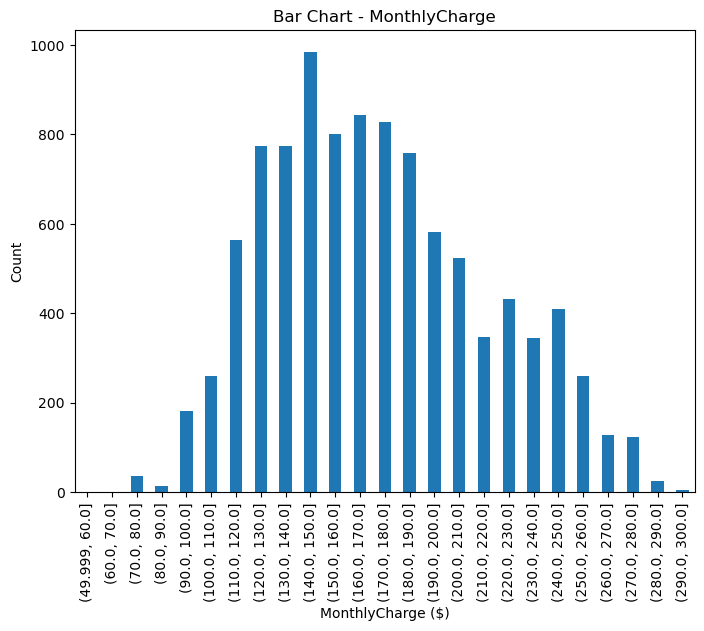

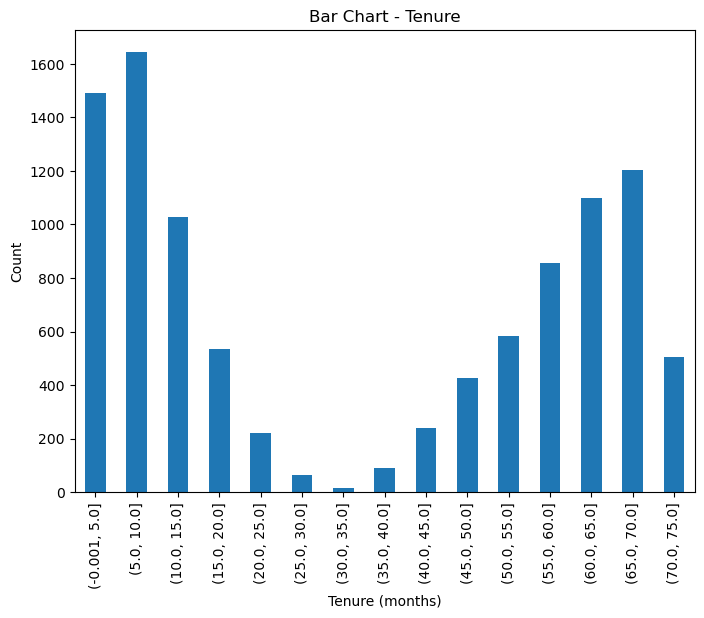

In [11]:
# Define the bin sizes for MonthlyCharge and Tenure
monthly_charge_bins = np.arange(50, 310, 10)
tenure_bins = np.arange(0, continuous_df['Tenure'].max() + 5, 5)

# Bar chart for MonthlyCharge with $10 increments
monthly_charge_counts = pd.cut(continuous_df['MonthlyCharge'], bins=monthly_charge_bins, include_lowest=True).value_counts().sort_index()
monthly_charge_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Bar Chart - MonthlyCharge')
plt.xlabel('MonthlyCharge ($)')
plt.ylabel('Count')

plt.show()

# Bar chart for Tenure with 5-year increments
tenure_counts = pd.cut(continuous_df['Tenure'], bins=tenure_bins, include_lowest=True).value_counts().sort_index()
tenure_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Bar Chart - Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')

plt.show()

### D.  Identify the distribution of two continuous variables and two categorical variables using bivariate statistics from your cleaned and prepared data.

I will be analyzing the same variables in section C1:

Continuous Variables:

    MonthlyCharge
    Tenure
    
Categorical Variables:

    Churn
    Timely Response

In [12]:
#Display dataframe for heatmap bivariate analysis of correlation
bivariate_df = df[['MonthlyCharge', 'Tenure', 'Churn', 'TimelyResponse']]
bivariate_df

,MonthlyCharge,Tenure,Churn,TimelyResponse
0,172.455519,6.795513,No,5
1,242.632554,1.156681,Yes,3
2,159.947583,15.754144,No,4
3,119.956840,17.087227,No,4
4,149.948316,1.670972,Yes,4
...,...,...,...,...
9995,159.979400,68.197130,No,3
9996,207.481100,61.040370,No,4
9997,169.974100,47.416890,No,4
9998,252.624000,71.095600,No,4


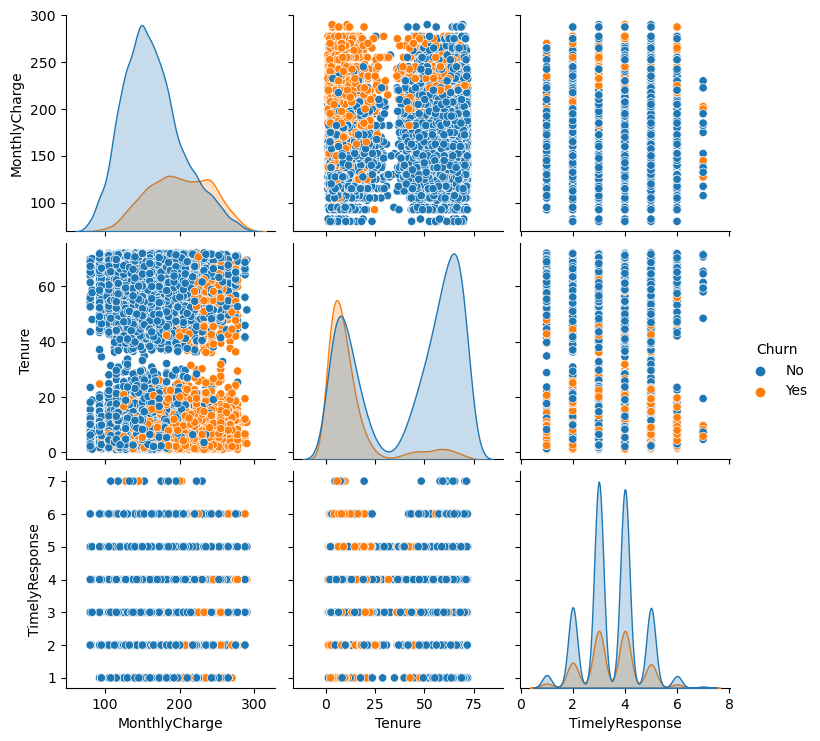

In [13]:
# Create a new data frame for the below sns plots with the selected variables
bivariate_df = df[['MonthlyCharge', 'Tenure', 'Churn', 'TimelyResponse']].copy()

# scatter plot matrix
sns.pairplot(bivariate_df, hue='Churn')
plt.show()

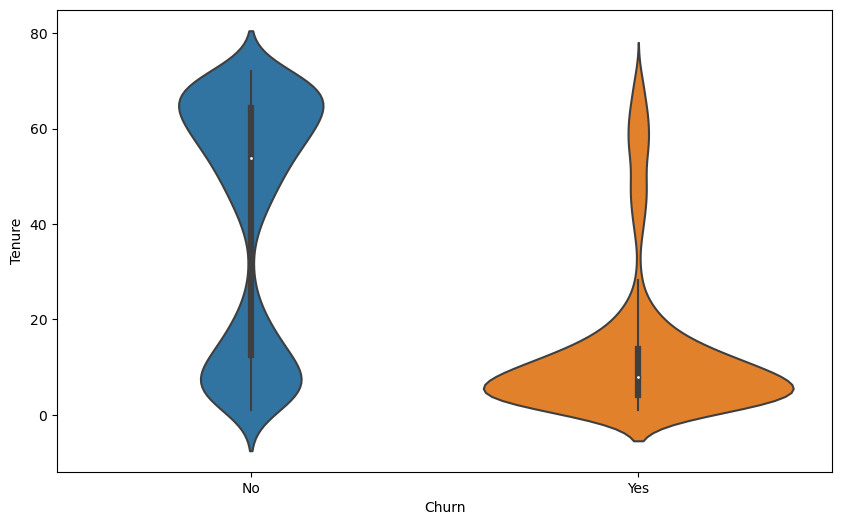

In [14]:
# violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=bivariate_df, x='Churn', y='Tenure')
plt.show()

### E1: Discuss the results of the hypothesis test.

The results of the hypothesis test indicated a significant difference in the Monthly Charge between customers who churned and customers who did not churn. The t-statistic of 40 and a p-value of 0 suggest that there is a strong association between the Monthly Charge and churn status. This is readily apparent by looking at the scatter plot matrix where there is a large visual difference between Monthly Charge and Churn status, and it implies that the Monthly Charge has a significant impact on the likelihood of churn.

### E2: Discuss the limitations of your data analysis.

The following limitations exist in many datasets, but are highlighted below as they are likely to exist in the churn_cleaned dataset:

1. The data analysis does not accurately detail interactions between variables, or the strength to which those interactions exist. For example, Monthly Charge may be highly region specific as there are large variations in the cost of living in defferent regions.

2. The length of time in which this data was captured is surely to produce different results, depending on what time you look at. As an example, using the "COVID" timeframe where individuals were often more at home would likely produce different data in amount of data consumed as well as other variables.

3. This data set is based on one Company. Different internet/TV providers might have different marketing approaches which would yield them different data. In short, while this dataset is large, it does not accurately reflect the entire consumer population of internet and TV.

4. Usage patterns in data were not included. The time a user uses the internet or TV, which channels and websites a user uses would allow for more nuanced analysis.

### E3: Recommend a course of action based on your results.

Based on the results, it is recommended to further investigate the relationship between Monthly Charge and churn. The significant difference suggests that adjusting the Monthly Charge may impact customer churn rates. Further analysis could involve examining the relationship between other variables and churn, considering customer segmentation to identify specific customer groups with high churn rates, and exploring potential strategies to optimize pricing and minimize churn. Additionally, it is important to consider the limitations of the data analysis and conduct further research to gain a comprehensive understanding of the factors influencing churn and to inform actionable strategies.

G.  Reference the web sources used to acquire segments of third-party code to support the analysis. 

 



https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/

https://matplotlib.org/stable/gallery/index.html

https://seaborn.pydata.org/tutorial.html
    
https://numpy.org/learn/
    
https://seaborn.pydata.org/examples/index.html
    
https://matplotlib.org/
    
https://www.w3schools.com/python/matplotlib_intro.asp
    
https://docs.scipy.org/doc/scipy/reference/stats.html
    
https://www.w3schools.com/python/pandas/default.asp
    
https://www.w3schools.com/python/numpy/numpy_intro.asp
    
https://pythonguides.com/scipy-stats/